# A gambler's ruin game: analytical and numerical solutions

## The problem

As part of basic training to start a research project in the field of interacting agent systems, a professor at University of São Paulo's Institute for Mathematics and Statistics dared me to solve a gambler's ruin problem with the following configuration:

- Player **A** starts with $150$ BRL
- Player **B** starts with $80$ BRL
- We define two parameters $p$ and $q$ such that $0 \leq p,q \leq 1$ and $p + q = 1$
- Each turn, either: 
    1. **A** transfers $10$ BRL to **B** with probability $q$; or
    2. **B** transfers $10$ BRL to **A** with probability $p$
- The game ends when any player goes broke

Questions:

**(i)** What is the probability that **A** goes broke? 

**(ii)** What is the expected duration of the game (in # of turns)?

In the following topics I first propose a theoretical, analytical solution and then a Python simulation that allows us to numerically verify the former.

## Analytical solution

### Introduction

When trying to solve the problem, I quickly realized that there are several different ways in which it can be solved. For instance, XXXX thinks of the symmetric version of the problem ($p=q=1/2$) as a recursion with two boundary conditions and solves it as an initial value problem (IVP), analogous to solving an ordinary differential equation using characteristic polynomials. On its turn, XXXX displays the asymmetric version in the form of a telescopic series and solves it using the techniques of sequences and series, akin to an introductory course in Real Analysis. Going one step further into generalizing the problem, XXXX frames it as a Markov Chain with two absorbing states.

Here I propose a more straightforward approach, much like a Physicist would tackle the problem for the first time without prior knowledge of the techniques above. The advantage is that only a very elementary knowledge of calculus and probability is required, such that a student in the middle of the first (STEM undergrad) semester is readily able to comprehend. For problem **(i)** my approach is somewhat similar to the one used by XXXX when modelling the absorption of particles by living systems in one dimension, consisting of decomposing the probabilities of alternate paths in a random walk. For problem **(ii)** I come up with an analogy with velocity that feels very intuitive for physicists.


### Setup

Denote $S_n$ as the money held by Player **A** during the $n$-th play. Since players are transferring to each other from a finite resource pool, they share the constraint that the sum of resources in the game is $150$ BRL + $80$ BRL $= 230$ BRL, so Player **B**'s account is simply $230$ BRL $- S_n $.

The process of solution is made much easier if we scale the problem by units of 10 BRL, such that 10 BRL = 1 monetary unit.

With this setup, the state of the system can be described by the sole number $S_n$, which starts at $S_0=15$ and ranges from 0 (where **A** is broke) to 23 (where **B** is broke). Displaying all the possible states in order (interval $[0,23]$ on the integers $\mathbb{Z}$) and plotting position $S_n$ against duration $n$ of the game (interval $[0,N]$ with $N \in \mathbb{Z}$), we can visualize $S_n$ as the position in a random walk as in the example run below:

**FIG EXEMPLO**

In such setup, each $i$-th step $X_i$ (i.e., one money transfer) equals 1 unit up or down, that is $X_i \in \{-1,1\}$, and $X_i$ is a random variable. Since position $S_n$ is a function of $X_i$, it is also a random variable. The walk has two absorbing barriers, one at $S_0$ and the other at $S_{23}$.

### Solution to question **(i)**

#### Step 1: recurring probabilities in a game with one barrier

We will first study a similar problem where Player **A** is not playing against another player, but rather against an infinite resouce pool, so **A** can get as rich as chance allows without the game ending. In other words, there is only one absorbing barrier at $S_0$.

We can forget about the initial position for now and consider the probability of **A** going broke starting from an arbitrary position $S$, no matter at which step of the simulation this position is reached. I denote this probability as $P_S^{|}$, where the superscript $|$ stands for the one-barrier problem. Note that this probability does not depend on the number of steps needed for **A** to lose.

It is useful to decompose $P_S^{|}$ into single unit steps in order to obtain a recurrence relation. Note that **A** gets as close as possible to being broke at any step $n$ when $S_n = S = 1$. In this situation, the probability that **A** takes the next step downward (i.e., transfers $10$ BRL to **B**) and loses for sure is $q\cdot P_0^{|}$, and it is clear that

$$P_0^{|}=1$$

, so the probability of such path is actually $q\cdot 1 = q$. If, however, **A** gets lucky and moves upward with probability $p$ (i.e., receives $10$ BRL from **B**), arriving at $S = 2$, then by definition the probability that the game eventually comes to an end, no matter how many steps are needed, is $P_2^{||}$. So when $S=1$, there are only two mutually exclusive possible paths for failure. The probability of failure can then be decomposed into:

$$P_1^{|}= q + p \cdot P_2^{|}$$

If $S = 2$, we can imagine that there is a new barrier at $S = 1$. The probability that the walk gets back to $S = 1$ is analogous to the expression above because it is akin to the game ending at this new imaginary barrier $S = 1$. Once back to $S = 1$, the expression above applies again. In other words, for **A** to lose from $S = 2$, she needs to fail the imaginary barrier first, going back to $S = 1$ (with the same analogous probability $P_1^{|}$), and then fail again, this time definitely, starting from $S = 1$, with the same probability $P_1^{|}$. This means

$$P_2^{|}= P_1^{|} \cdot P_1^{|} = (P_1^{|})^2$$

Combining equations above, we reach one single equation with one variable $P_1^{|}$ of degree two, for which we can solve finding the two roots:

$$P_1^{|}= q + p \cdot (P_1^{|})^2 \,\, \Leftrightarrow \,\, P_1^{|\,\prime}= \frac{q}{p} \,\,\,;\,\,\, P_1^{|\,\prime\prime} = \frac{1-q}{p} = \frac{p}{p} =  1 $$

So one root gives us $q$/$p$ and the other gives us $1$, the question is: which one do we choose? Intuitively, we know that a probability equaling $1$ means the probability of an event that is certain. We also know that a probability greater than $1$ does not make sense. However, if $q>p$, the first root $P_1^{|\,\prime}>1$, which is nonsensical. This tells us that in such region $q>p \Leftrightarrow 0.5 \leq q \leq 1 $ only the second root can be valid, meaning in this situation Player **A** will certainly go broke (eventually).

On the other hand, if $q<p \Leftrightarrow 0 \leq q \leq 0.5$, then the first root can apply, as it is a number between $0$ and $1$, but the second root cannot apply. To see why, we should think of the situation where $p=1$ and $q=0$; of course, even if Player **A** at $S=1$ right next to failure, there is $0$ probability that she ever takes a step downward, so probability of failure would also be $P_1^{|}=0$. But the second root $P_1^{|\,\prime\prime}=1$ is not compatible with this boundary condition.

Recalling that $P_2^{|}=(P_1^{|})^2$, and if by analogy we see that $P_S^{|}=(P_1^{|})^S$, then we can calculate the probability $P_S^{|}(S)$ for any $S$. So altogether we have:

$$
P_S^{|} = 
\begin{cases} 
(q/p)^S & \text{if } 0 \leq q \leq 0.5 \\
1^S = 1 & \text{if } 0.5 \leq q \leq 1
\end{cases}
$$


Note that when $0 < q \leq 0.5$, there is a non-zero probability that **A** will never go broke!

#### Step 2: adding one more barrier

Now, when we go back to our original game where both player's resources are fixed, the game can end either when $S = 0$ or when $S = 23$. However, the probability $P_S^{|}$ we obtained above says nothing about this second barrier at $S = 23$. Recall that $P_S^{|}$ measures the probability of **A** going broke with one barrier, that is, of **A** ever reaching $S=0$ at all. For all it cares, **A** could even surpass the point $S=23$, finding herself e.g. at $S = 24$, only to fall from grace and reach $S=0$ eventually. In spite of being accounted for in $P_S^{|}$, this possibility would clearly trigger the game to end with **B** going broke, not **A**.

**FIGURA**

So we want to find an expression for a more specific probability $P_S^{||}$ of **A** losing, where the superscript $||$ denotes we are now in the two-barrier case. We can start with a similar procedure to the one-barrier case by splitting up the expression for $P_S^{|}$ between the probability $P_S^{||}$ of reaching $S = 0$ without first reaching $S = 23$ and the probability $P^*$ of reaching $S = 0$ after reaching $S = 23$:

$$P_S^{|} = P_S^{||} + P^*$$

At this point the problem is reduced to finding an expression for $P^*$. Recall that when $0\leq q\leq 1/2$ then $P_S^{|} = 1$. If we remove the barrier at $S = 0$ (i.e., if we make **A** have infinite money), then we are back to a one-barrier game ending at $S=23$. By symmetry, the probability of **B** going broke will be $1$ if $0.5 \leq 1-q = p \leq 1$. We can conclude that in the two-barrier scenario, all paths will eventually visit either $S=0$ or $S=23$, so it is certain that eventually one of the players will lose. It follows that either **A** loses with probability $P_S^{||}$ or **B** loses with probability $(1-P_S^{||})$.

On her turn, **B** can lose either via a path that would eventually lead to $S=0$ or one that would never visit $S=0$. Since only the first path would be accounted for in $P_S^{||}$, it is the one we are interested in. Once **B** loses, the walk is at $S=23$, where the probability of getting to $S=0$ is $P_{23}^{|}$, as per our definition of $P_S^{|}$. So

$$P^*=(1-P_S^{||})\cdot P_{23}^{|}$$

Joining equations above and substituting $S=15$ as the starting point, we get:

$$P_{15}^{|} = P_{15}^{||} + (1-P_{15}^{||})\cdot P_{23}^{|}$$

Recall that earlier we obtained a piecewise function for $P_S^{|}$. In the first case, when $0\leq q < 0.5$ and $P_S^{|}=(q/p)^S$, by doing some algebra in the equation above we get:

$$P_{15}^{||} =\frac{(p/q)^8-1}{(p/q)^{23}-1} \,\,\,\,\,\,\,\, p,q\neq0.5$$

In the second case, when $0.5 < q\leq0.5$ and $P_S^{|}=1$, the equation would be trivial, yielding no new information. But if one exploits the symmetry in the one-barrier probability for the barrier at $S=23$, one can demonstrate the above result is valid for this region as well. We also have an indeterminacy at $p=q=0.5$, but by taking the limit at this point, we get $P_{15}^{||} = 8/23$.

<u>**ANSWER:**</u>

$$
\boxed{
P_S^{|} = 
\begin{cases} 
\frac{[(1-q)/q]^8-1}{[(1-q)/q]^{23}-1} & \text{if } q \neq 0.5 \text{  and  } 0 \leq q \leq 1 \\
8/23 & \text{if } q = 0.5
\end{cases}
}
$$

### Solution to question **(ii)**

Question (ii) asks us to find the expected duration of the game.

In the solution to the previous question, we saw that our two-barrier game is certain to end eventually. We also learned how to calculate the probability $P_S$ of each player going broke from an initial position $S$ relative to the respective failure point. We can use these results if we think in terms of displacement and average velocity of the walk.

At any $n$-th step of the game we can find the position $S_n$ of **A** by summing up all the steps the Player has taken thus far, that is:

$$S_n = \sum_{i=0}^n X_i$$

If the starting point is $S_0 = 15$, the total displacement (net result) of a Player's account at any given step will be:

$$\Delta S_n = S_n - 15$$

The probability distribution of one single step is composed of the probabilities $q$ and $p$ as follows:

$$P(X_i) = \delta_{x_i,-1}\cdot q + \delta_{x_i,1}\cdot p$$

From this, and using $q = 1-p$, we can calculate the mean size of the step itself as:

$$\mathbb{E}(X_i) = 2p - 1$$

, which is non-zero for $p\neq q$. This variable can be thought of as the average velocity $v$ of the walk since it is the average displacement within one unit of time/duration (which is simply 1 step). So

$$\mathbb{E}(X_i) = v$$

Denote the total time $\Delta N$ it takes on average for Player **A** to be displaced by $\Delta S$. Then by the definition of average velocity,

$$v=\frac{\Delta S}{\Delta N}$$

Since parameters $p$ and $q$ are constant, the average velocity of the walk is also constant, valid for any stretch $\Delta N$. In particular, we want to analyze the whole path up until one player loses. So for all possible sequences $(X_1, X_2, ..., X_i)$ of steps, we want to select those who we know beforehand will have caused the game to end at time $N$. The condition for this to happen is if either $S_N = 0$ (meaning $\Delta S_N = -15$) or $S_N=23$ (meaning $\Delta S_N = 8$). Realizing that $\Delta S_N$ is a random variable, we can condition its probability distribution $Y(\Delta S_N)$ to the event $E$ that the walk has ended, yielding:

$$Y(\Delta S_N|E) = \delta_{\Delta S_N, -15} \cdot P_{15} + \delta_{\Delta S_N, 8} \cdot (1 - P_{15})$$

Taking the mean, we can find the average displacement $\mathbb{E}(\Delta S_N|E)$ needed for the walk to end and plug it into the definition of average velocity, yielding:

$$
\begin{align}
v  &= \frac{\mathbb{E}(\Delta S_N|E)}{\mathbb{E}(\Delta N|E)} \\
\Leftrightarrow \mathbb{E}(\Delta N|E) &= \frac{\mathbb{E}(\Delta S_N|E)}{v}\\
\Leftrightarrow \mathbb{E}(\Delta N|E) &= \frac{-15P_{15}+8(1-P_{15})}{2p - 1}
\end{align}
$$

The variable to the left is precisely the expected duration of the random walk. Plugging the value of $P_{15}$ obtained in the solution to Question **(i)** and manipulating the equation, we get:

$$\mathbb{E}(\Delta N|E) = \frac{-15\left[\frac{(p/q)^8-1}{(p/q)^{23}-1}\right]+8\left[1-\frac{(p/q)^8-1}{(p/q)^{23}-1}\right]}{2p - 1} \,\,\,\, \,\,\,\, p,q\neq 0.5$$

Finally, we can note there is an indeterminacy at $p,q = 0.5$. This is to be expected since in a symmetrical walk the expected step size (thus average velocity) will be $0$ so the analogy with velocity breaks down. But since the expression above is valid for all other values of $p$ and $q$, we can compute its limit as $p\rightarrow 1/2$, yielding:

$$\mathbb{E}(\Delta N|E) = 120 \,\,\,\,\,\,\,\,\, p,q = 0.5$$



<u>**ANSWER:**</u>

$$
\boxed{
\mathbb{E}(\Delta N|E) = 
\begin{cases} 
\frac{-15\left\{\frac{[(1-q)/q]^8-1}{[(1-q)/q]^{23}-1}\right\}+8\left\{1-\frac{(p/q)^8-1}{(p/q)^{23}-1}\right\}}{2p - 1} & \text{if } q \neq 0.5 \text{  and  } 0 \leq q \leq 1 \\
8\cdot15 = 120 & \text{if } q = 0.5
\end{cases}
}
$$





## Python simulation




Let us first import our dependencies:

In [1]:
from matplotlib import pyplot as plt
import random as rnd
import statistics as stats

We start by creating functions for generating random walks:

In [6]:
# function that performs a random walk
# and returns the sequence of steps
def new_walk(q = 1/2, s_0 = 15, inf = 0, sup = 23):
    # q     probability of A transferring to B
    # s_0   initial position
    # inf   position where A loses
    # sup   position where B loses

    # initial conditions
    s = s_0
    t = 0
    
    # list that registers each step
    seq_steps = []

    # main loop
    while s > inf and s < sup:
        if rnd.random() <= q:
            s -= 1
        else:
            s += 1
        seq_steps.append(s)
        t += 1

    return seq_steps

# function that performs a sequence of random walks
# and returns a list with the seq_steps
# (output of function new_walk)
# of each walk
def seq_walks(n, q = 1/2):
    # n     number of walks to be generated
    # q     probability of A transferring to B
    #       (passed to function new_walks)
    walks = []

    # loop da funcao
    for i in range(n):
        walks.append(new_walk(q = q))

    return walks


Defining our plot function, we can create graphs such as the ones in the last topic or the one below (15 random walks with $p=0.501$ and $q=0.499$):

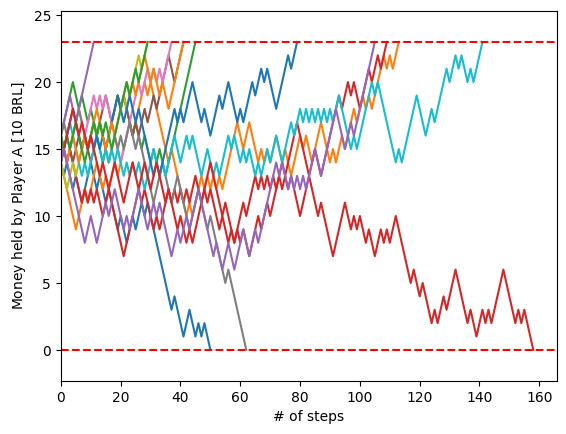

In [18]:
# function that plots a sequence of walks
def plot_walks(n, q=1/2, b1=0, b2=23):
    # n     number of walks to be generated
    # q     probability of A transferring to B
    #       (passed to function new_walks)
    # b1    lower barrier
    # b2    upper barrier

    # main loop
    for walk in seq_walks(15, q):
        plt.plot(walk)

    # plot aesthetics
    plt.ylim(b1-(b2-b1)*0.1,b2+(b2-b1)*0.1)
    plt.xlim(0)
    plt.axhline(y=b1, color='r', linestyle='--')
    plt.axhline(y=b2, color='r', linestyle='--')
    plt.xlabel("# of steps")
    plt.ylabel("Money held by Player A [$10$ BRL]")
    plt.show()
    plt.close()

plot_walks(15, q=0.499)

## Conclusion

## References